# Lista 2

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from scipy import signal


import matplotlib.style as style 

plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = 7, 5
plt.rcParams['text.usetex'] = True

# Refazendo o Exemplo 5.1 do livro

Especificações do filtro:

$M = 52$

$\Omega_p = 4.0$ rad/s

$\Omega_r = 4.2$ rad/s

$\Omega_s = 10.0$ rad/s

We divide the [$0 , \Omega_s$] intervalo into ($M+1$) $= 53$ sub-intervals of the same length $\Omega_s / (M+1)$, each starting at $\Omega_k = $ [$\Omega_s / (M+1)$]$k$, for $k = 0, 1, ... M$. Accordint to the prescribed specifications, $\Omega_p$ and $\Omega_r$ lie close to the extremes

In [37]:
M = 52
N = M+1
freq_pass = 4
freq_rej = 4.2
freq_stop = 10
kp = np.floor((M+1)*(freq_pass/freq_stop))
kr = np.floor((M+1)*(freq_rej/freq_stop))


size1 = int(kp + 1)
A_part1 = np.ones((1, size1)) 
size2 = int(M/2 - kr + 1)
A_part2 = np.zeros((1, size2))
A = np.concatenate((A_part1, A_part2), axis=1)
A = A[0]

k = np.arange(1, int(M/2))
h = np.empty((N)) 

p1 = np.power(-1, k)
p2 = A[k]

for n in range(M+1):
    h[n] = A[0] + 2*np.sum(p1*p2*np.cos(np.pi*k*(1+2*n)/N))
    h[n] = h[n]/N
    
x = h

In [38]:
# size1 = int((kp + 1)*120)
# B_part1 = np.ones((1, size1)) 
# size2 = int((M/2 - kr + 1)*120)
# B_part2 = np.zeros((1, size_2))

# size3 = int(3120 - size_1 - size2)
# B_part3 = np.zeros((1, size_3))
# B = np.concatenate((B_part1, B_part2, B_part3), axis=1)
# B = B[0]

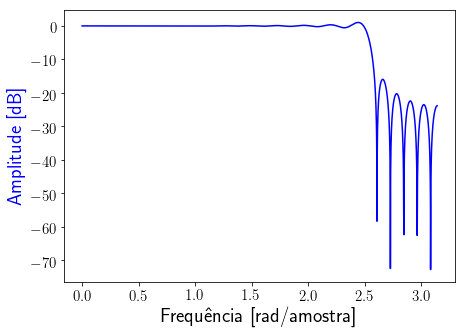

In [39]:
w, h = signal.freqz(x, worN=M*60)

fig, ax1 = plt.subplots()

ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel(r'Amplitude [dB]', color='b')
ax1.set_xlabel(r'Frequência [rad/amostra]')

# ax2 = ax1.twinx()
# angles = np.unwrap(np.angle(h))
# ax2.plot(w, angles, 'g')
# ax2.set_ylabel(r'Ângulo [rad]', color='g')
# ax2.grid()
# ax2.axis('tight')

# ax3 = ax1.twinx()
# ax3.plot(w, B2, 'r')
# ax3.set_ylabel(r'Original', color='g')
# ax3.grid()
# ax3.axis('tight')
plt.show()

# Minha própria versão

In [40]:
A = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Ideal "desenhado"

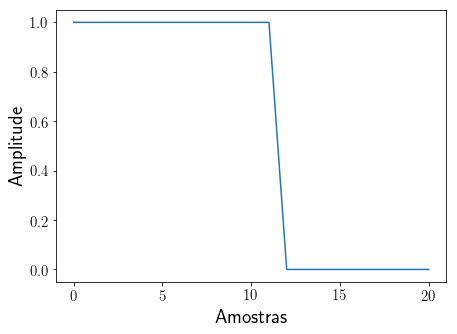

In [41]:
fig, ax1 = plt.subplots()

ax1.plot(A)
ax1.set_ylabel(r'Amplitude')
ax1.set_xlabel(r'Amostras')
plt.savefig('ideal.eps', transparent=True, optimize=True, bbox_inches='tight')

plt.show()


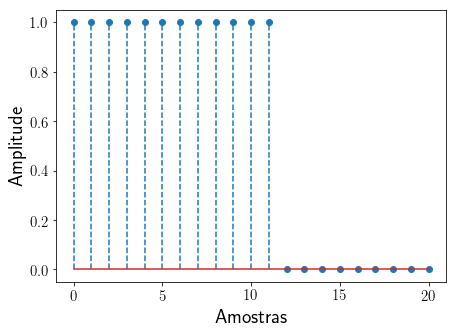

In [42]:
fig, ax1 = plt.subplots()

ax1.stem(A, linefmt='C0--')
ax1.set_ylabel(r'Amplitude')
ax1.set_xlabel(r'Amostras')
plt.savefig('ideal_amostrado.eps', transparent=True, optimize=True, bbox_inches='tight')

plt.show()


In [43]:
M = 2*len(A)
N = M + 1

k = np.arange(1, int(M/2))
h = np.empty((N)) 

p1 = np.power(-1, k)
p2 = A[k]

for n in range(M+1):
    h[n] = A[0] + 2*np.sum(p1*p2*np.cos(np.pi*k*(1+2*n)/N))
    h[n] = h[n]/N
    
x = h

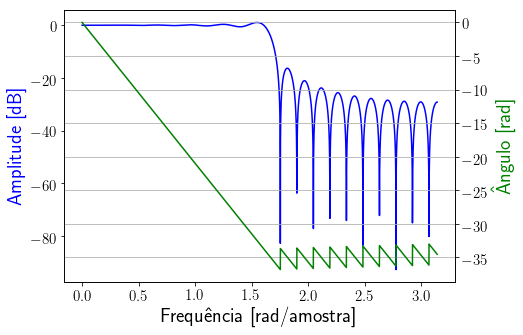

In [44]:
w, h = signal.freqz(x, worN=M*120)

fig, ax1 = plt.subplots()

ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel(r'Amplitude [dB]', color='b')
ax1.set_xlabel(r'Frequência [rad/amostra]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel(r'Ângulo [rad]', color='g')
ax2.grid()
ax2.axis('tight')
plt.savefig('freq.eps', transparent=True, optimize=True, bbox_inches='tight')


plt.show()

# Tentando fazer um ser filtro com fase não-linear linear

In [45]:
A = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,0])


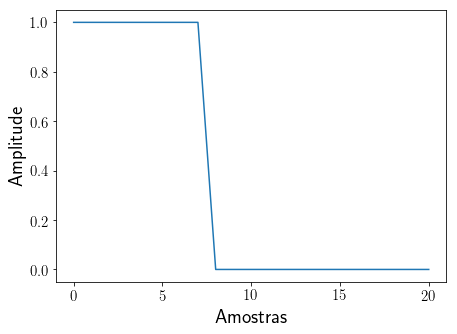

In [46]:
fig, ax1 = plt.subplots()

ax1.plot(A)
ax1.set_ylabel(r'Amplitude')
ax1.set_xlabel(r'Amostras')
plt.savefig('ideal_nl.eps', transparent=True, optimize=True, bbox_inches='tight')

plt.show()


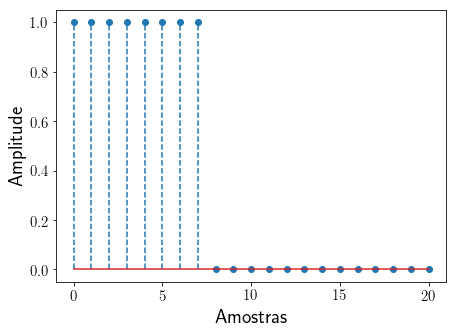

In [47]:
fig, ax1 = plt.subplots()

ax1.stem(A, linefmt='C0--')
ax1.set_ylabel(r'Amplitude')
ax1.set_xlabel(r'Amostras')
plt.savefig('ideal_amostrado_nl.eps', transparent=True, optimize=True, bbox_inches='tight')

plt.show()


In [48]:
x = [0.0668849217274138, 0.165342352374203, 0.211751607148966, 0.148688389252944, 0.0628280947117017, 0.106864836727945, 0.280001986494385, 0.377197767789384, 0.220063514522859, -0.102878776268540, -0.318593503971541, -0.279561103950642, -0.100667945800579, 0.0250094229901153, 0.0496408047392011, 0.0533334570896668, 0.0770335529115945, 0.0728435357951438, 0.0114499952826740, -0.0568288801498377, -0.0690167281036098, -0.0348951408800108, 0.00439311171312708]

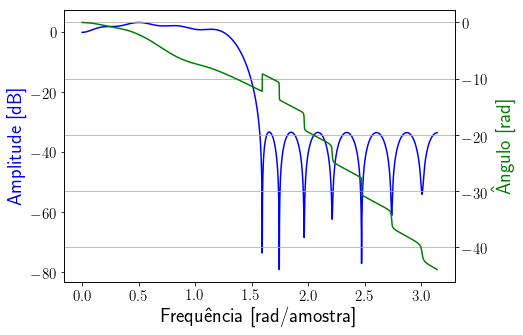

In [49]:
w, h = signal.freqz(x, worN=M*120)

fig, ax1 = plt.subplots()

ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel(r'Amplitude [dB]', color='b')
ax1.set_xlabel(r'Frequência [rad/amostra]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel(r'Ângulo [rad]', color='g')
ax2.grid()
ax2.axis('tight')
plt.savefig('freq_nl.eps', transparent=True, optimize=True, bbox_inches='tight')

plt.show()
